<a href="https://colab.research.google.com/github/andrears2112/IA/blob/main/ejemplo_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pathlib

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar = True)
data_dir = pathlib.Path(data_dir)

In [4]:
img_height,img_width = 90,90
batch_size = 32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split = 0.2,
  subset = "training",
  seed = 123,
  image_size = (img_height, img_width),
  batch_size = batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split = 0.2,
  subset = "validation",
  seed = 123,
  image_size = (img_height, img_width),
  batch_size = batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


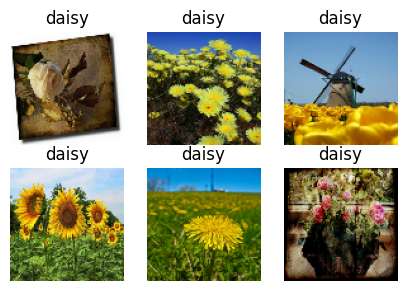

In [7]:
plt.figure(figsize = (5, 5))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")

In [8]:
resnet_model = Sequential()

pretrained_model = tf.keras.applications.ResNet50(include_top = False,
                   input_shape = (90,90,3),
                   pooling = 'avg',
                   classes = 5,
                   weights = 'imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(5, activation = 'softmax'))

In [9]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrap  (None, 2048)              0         
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (None, 512)               1049088   
 apper)                                                          
                                                                 
 module_wrapper_2 (ModuleWr  (None, 5)                 2565      
 apper)                                                          
                                                                 
Total params: 24639365 (93.99 MB)
Trainable params: 1051653 (4.01 MB)
Non-trainable params: 23587712 (89.98 MB)
__________

In [10]:
resnet_model.compile(optimizer = Adam(learning_rate=0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = resnet_model.fit(
  train_ds,
  validation_data = val_ds,
  epochs = 5
)

Epoch 1/5
92/92 [==============================] - 137s 1s/step - loss: 1.1379 - accuracy: 0.6941 - val_loss: 0.5498 - val_accuracy: 0.8093
Epoch 2/5
92/92 [==============================] - 142s 2s/step - loss: 0.4032 - accuracy: 0.8566 - val_loss: 0.5162 - val_accuracy: 0.8174
Epoch 3/5
92/92 [==============================] - 141s 2s/step - loss: 0.2473 - accuracy: 0.9135 - val_loss: 0.5956 - val_accuracy: 0.7847
Epoch 4/5
92/92 [==============================] - 137s 1s/step - loss: 0.1569 - accuracy: 0.9499 - val_loss: 0.5352 - val_accuracy: 0.8120
Epoch 5/5
92/92 [==============================] - 137s 1s/step - loss: 0.1005 - accuracy: 0.9724 - val_loss: 0.5890 - val_accuracy: 0.7875


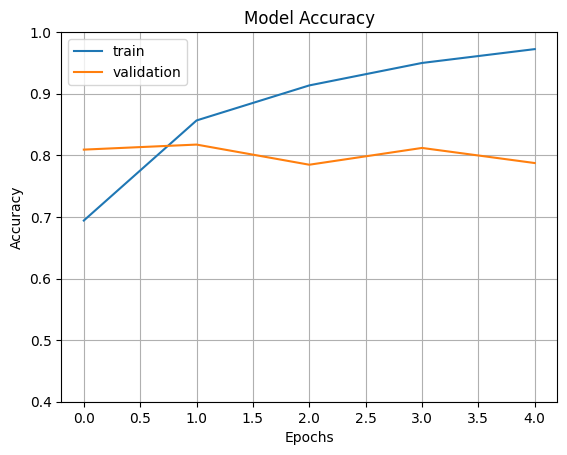

In [11]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin = 0.4,ymax = 1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

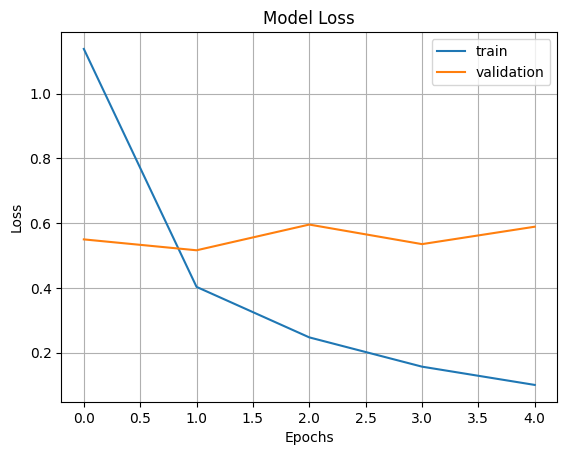

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()